In [0]:
import re

book = "The Adventures of Sherlock Holmes.txt"

pattern = "(Chapter*\s[0-9]*\s['A-Z-\w ]+)" + "(.*?)" + "(?=Chapter*\s[0-9]*\s['A-Z-\w ]|" "End of the Project Gutenberg)"
with open(book, 'r') as f:
        text = (f.read().replace('&rsquo;', "'")
                        .replace('&lsquo;', "'")
                        .replace('&rdquo;', '"')
                        .replace('&ldquo;', '"')
                        .replace('&mdash;', '—'))

chapters = re.findall(pattern, text, re.DOTALL)

Parts of Speech and Meaning (English Only)

In [0]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.


In [0]:
t=chapters[0][1]
from nltk import sent_tokenize, word_tokenize
sentences = sent_tokenize(t.lower())
sentences

['\n\n\ni.\n\nto sherlock holmes she is always _the_ woman.',
 'i have seldom heard him\nmention her under any other name.',
 'in his eyes she eclipses and\npredominates the whole of her sex.',
 'it was not that he felt any emotion\nakin to love for irene adler.',
 'all emotions, and that one particularly,\nwere abhorrent to his cold, precise but admirably balanced mind.',
 'he\nwas, i take it, the most perfect reasoning and observing machine that\nthe world has seen, but as a lover he would have placed himself in a\nfalse position.',
 'he never spoke of the softer passions, save with a gibe\nand a sneer.',
 'they were admirable things for the observer—excellent for\ndrawing the veil from men’s motives and actions.',
 'but for the trained\nreasoner to admit such intrusions into his own delicate and finely\nadjusted temperament was to introduce a distracting factor which might\nthrow a doubt upon all his mental results.',
 'grit in a sensitive\ninstrument, or a crack in one of his own h

**Tokenization** 
the process by which big quantity of text is divided into smaller parts called tokens

In [0]:
tokens = word_tokenize(sentences[2])
tokens

['in',
 'his',
 'eyes',
 'she',
 'eclipses',
 'and',
 'predominates',
 'the',
 'whole',
 'of',
 'her',
 'sex',
 '.']

Parts of speech taging

In [0]:
from nltk import pos_tag
tags = pos_tag(tokens)
tags

[('in', 'IN'),
 ('his', 'PRP$'),
 ('eyes', 'NNS'),
 ('she', 'PRP'),
 ('eclipses', 'VBZ'),
 ('and', 'CC'),
 ('predominates', 'VBZ'),
 ('the', 'DT'),
 ('whole', 'NN'),
 ('of', 'IN'),
 ('her', 'PRP$'),
 ('sex', 'NN'),
 ('.', '.')]

In [0]:
import nltk.help
nltk.help.upenn_tagset('NN')

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...


In [0]:
#text
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
vectorizer

text=[text]
X = vectorizer.fit_transform(text)
X

<1x7883 sparse matrix of type '<class 'numpy.int64'>'
	with 7883 stored elements in Compressed Sparse Row format>

In [0]:
X.toarray()

array([[6, 3, 4, ..., 1, 1, 1]])

In [0]:
words = vectorizer.get_feature_names()
words[100:150]

['_echo_',
 '_employé_',
 '_en',
 '_encyclopædia',
 '_encyclopædia_',
 '_evening',
 '_fait',
 '_fiancé_',
 '_globe_',
 '_incognito_',
 '_l',
 '_locus',
 '_lone',
 '_morning',
 '_métier_',
 '_nous',
 '_née_',
 '_omne',
 '_our_',
 '_outré_',
 '_pall',
 '_partie',
 '_pâté',
 '_répertoire_',
 '_sophy',
 '_st',
 '_standard_',
 '_star_',
 '_the',
 '_the_',
 '_very_',
 '_voilà',
 'abandoned',
 'abandons',
 'abbots',
 'aberdeen',
 'abhorrent',
 'abide',
 'abiding',
 'abjure',
 'able',
 'abnormal',
 'abnormally',
 'abode',
 'abominable',
 'abomination',
 'abound',
 'abroad',
 'abrupt',
 'abruptly']

Term Frequency Inverse Document Frequency (TF IDF)

In [0]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()
tfidf

X_weighted = tfidf.fit_transform(X)
X_weighted.toarray()

array([[0.00429747, 0.00214873, 0.00286498, ..., 0.00071624, 0.00071624,
        0.00071624]])

Scikit-learn packages a decomposition technique called non-negative matrix factorization (NMF) that we can use for topic extraction.

In [0]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=10).fit(X_weighted)

feature_names = vectorizer.get_feature_names()

for topic_idx, topic in enumerate(nmf.components_):
    print('Topic #%d:' % topic_idx)
    print(' '.join([feature_names[i] for i in topic.argsort()[:-20 - 1:-1]]))
    print('')

Topic #0:
said holmes man mr little think shall know room come did time door came good face just matter yes hand

Topic #1:
extraordinary gold came soon gently lock terribly whitney catch double fainted woods master cheeks smoke cloak exactly tall men opened

Topic #2:
lady useful hold prevent lodgings temper fellow brandy aunt trees covered inquiries asleep took thank silence cupboard game folded interested

Topic #3:
gipsies step suggested brows oh education says spark vile vital study quiet attend support replace referred guilty laws times immediate

Topic #4:
reason inquiry affect recognised keenest sufficient shutter date scent individual order included boarding roar passion leaves undoubtedly tail practical sorrow

Topic #5:
hear right doors utterly endeavouring wanting link ceremony machine surely burst late gazed clergyman creating male security uniform prison accounts

Topic #6:
shining domain allegro stopped begging forgive fields manners exacted harness dad coat couple trace

/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/nmf.py:113: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(res * 2)


We are using gensim package to build LDA model

In [0]:
from gensim import corpora, models, similarities, matutils

# create the corpus using a conversion utility
gensim_corpus = matutils.Sparse2Corpus(X_weighted)

# build the LDA model
lda = models.LdaModel(gensim_corpus, num_topics=100)
lda

In [0]:
from nltk.stem import PorterStemmer
porter = PorterStemmer()
stemwords= []

for word in words:
  stemwords.append(porter.stem(word))
print(stemwords)

['000', '10', '100', '1000', '10_s_', '10th', '11', '117', '12', '120', '12_s_', '12th', '14', '140', '15', '150', '1500', '1661', '16a', '17', '1846', '1858', '1869', '1870', '1878', '1883', '1884', '1887', '1888', '1890', '19th', '1_s_', '20', '200', '2001', '2002', '2019', '220', '221b', '226', '22nd', '249', '25', '250', '26', '26_s_', '27', '270', '29', '2_s_', '2nd', '30', '31', '35', '3rd', '40', '4000', '421', '4700', '4_d_', '4th', '4½', '50', '501', '596', '60', '6221541', '64', '6_d_', '700', '750', '750175', '77', '7_s_', '7th', '801', '809', '82', '83', '84', '84116', '85', '87', '88', '89', '8_d_', '8_s_', '90', '99775', '9th', '_affair', '_american', '_bijou_', '_can_', '_cart', '_caus', '_chronicle_', '_danseuse_', '_disjecta', '_dénouement_', '_echo_', '_employé_', '_en', '_encyclopædia', '_encyclopædia_', '_even', '_fait', '_fiancé_', '_globe_', '_incognito_', '_l', '_locu', '_lone', '_morn', '_métier_', '_nou', '_née_', '_omn', '_our_', '_outré_', '_pall', '_parti', 

<FreqDist with 5535 samples and 7883 outcomes>


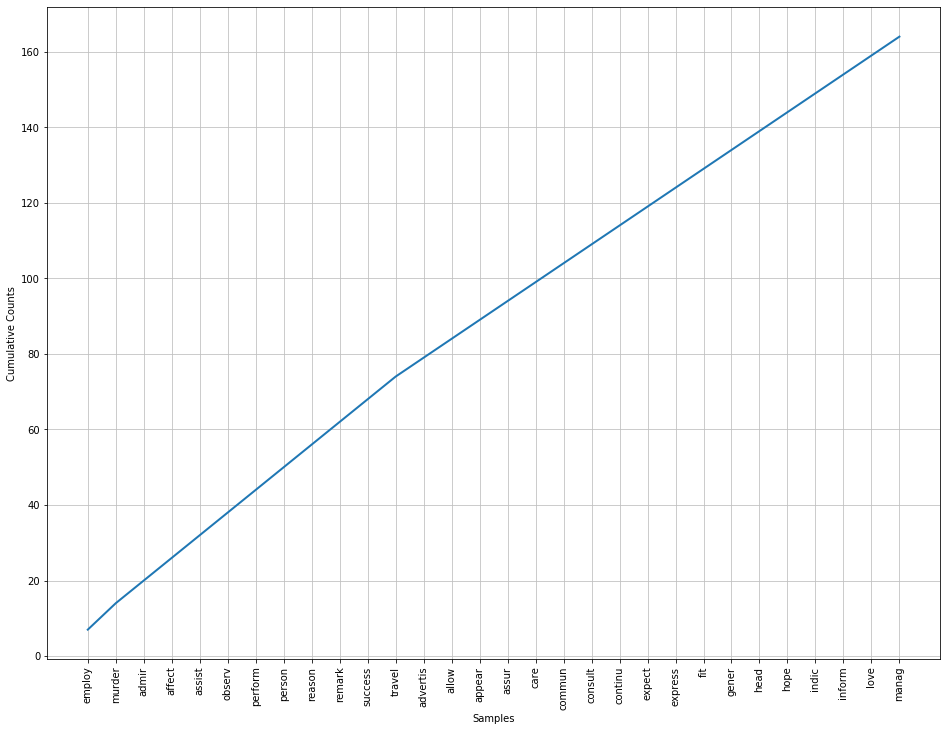

In [0]:
fdist = nltk.FreqDist(stemwords)
print(fdist)


fdist.most_common(30)


fig, ax = plt.subplots(figsize=(16,12))
ax = fdist.plot(30, cumulative=True)